# Car price Analysis
Performed: 1) Data collecting 
           2) Data Sanitization 
           3) Problem Statements 
           4) EDA
           5) Model Building 
           6) Prediction 
           7) Regression Plot(Actual vs Predicted Values)

# Problem Statements:
The questions are taken from Google and HackerRank both combined.

1) Drop all the cars where the price < 10000.
2) Which car was bought maximum number of times by customers and whats the highest price for a car in the dataset?
3) Sort and Return the resultant dataframe in acending order by price.
4) Does Fuel Type affecting the price of cars differently?
5) Which variables are significant in predicting the price of a car. 
6) How well those variables describe the price of a car.

In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

# Data collecting

In [2]:
#loading dataset
df= pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

Dataset contains of 205 rows & 26 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data Sanitization

In [6]:
#checking for null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No null values were present.

In [7]:
#checking for duplicated values
df.duplicated().sum()

0

No duplicate values were present.

# Problem Statements

# 1. Drop all the cars where the price < 10000.

In [8]:
#creating new dataset variable name for the problem statements as new_df
new_df= df[df['price'] >= 10000]

In [9]:
print('Before removing the values less than 10000, the rows & columns are:', df.shape)
print('After removing all the values which are less than 10000, the rows & columns are:', new_df.shape)

Before removing the values less than 10000, the rows & columns are: (205, 26)
After removing all the values which are less than 10000, the rows & columns are: (105, 26)


# 2. Which car was bought maximum number of times by customers and whats the highest price for a car in the dataset?

In [10]:
#checking for the most repitative car name in the dataset
new_df.max().head()

car_ID              205
symboling             3
CarName       vw dasher
fueltype            gas
aspiration        turbo
dtype: object

In [11]:
#printing the highest car price
print('The car that was bought maximum number of times by customers: "vw dasher"')
print('The highest price for a car in the dataset is:', new_df['price'].max())

The car that was bought maximum number of times by customers: "vw dasher"
The highest price for a car in the dataset is: 45400.0


# 3. Sort and Return the resultant dataframe in acending order by price.

In [12]:
new_df.sort_values(by='price', ascending=True)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
147,148,0,subaru tribeca,gas,std,four,wagon,fwd,front,97.0,...,108,mpfi,3.62,2.64,9.0,94,5200,25,31,10198.0
62,63,0,mazda rx-4,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10245.0
40,41,0,honda accord,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,10295.0
42,43,1,honda civic (auto),gas,std,two,sedan,fwd,front,96.5,...,110,2bbl,3.15,3.58,9.1,100,5500,25,31,10345.0
61,62,1,mazda glc custom,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
128,129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0


# 4. Does Fuel Type affecting the price of cars differently?

In [13]:
#defining these columns into variables for plotting
fuel_type = new_df['fueltype']
Price = new_df['price']

In [14]:
from matplotlib import style

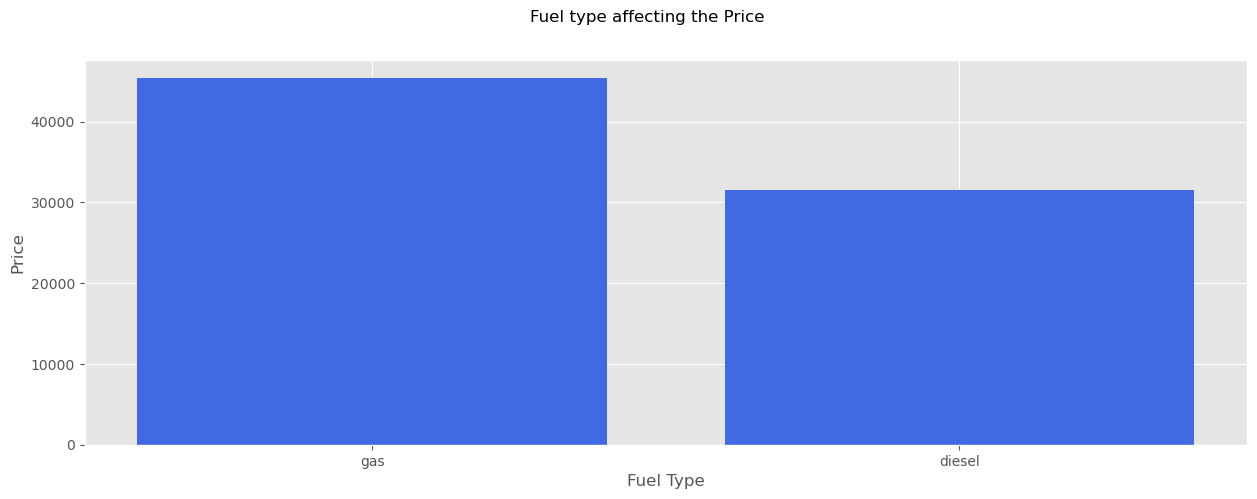

In [15]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Fuel type affecting the Price')
plt.subplot()
plt.bar(fuel_type, Price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()

Yes, the Fuel Type is do affecting the Price of the cars.
As shown in the graph above, Diesel cars cost less than the Gas ones.

# 5. Which variables are significant in predicting the price of a car.

In [16]:
#defining these columns into variables for plotting
Car_body = new_df['carbody']
door_number = new_df['doornumber']
Aspiration = new_df['aspiration']
Engine_location = new_df['enginelocation']
Drive_wheel = new_df['drivewheel']
Symboling = new_df['symboling']
Fuel_system = new_df['fuelsystem']

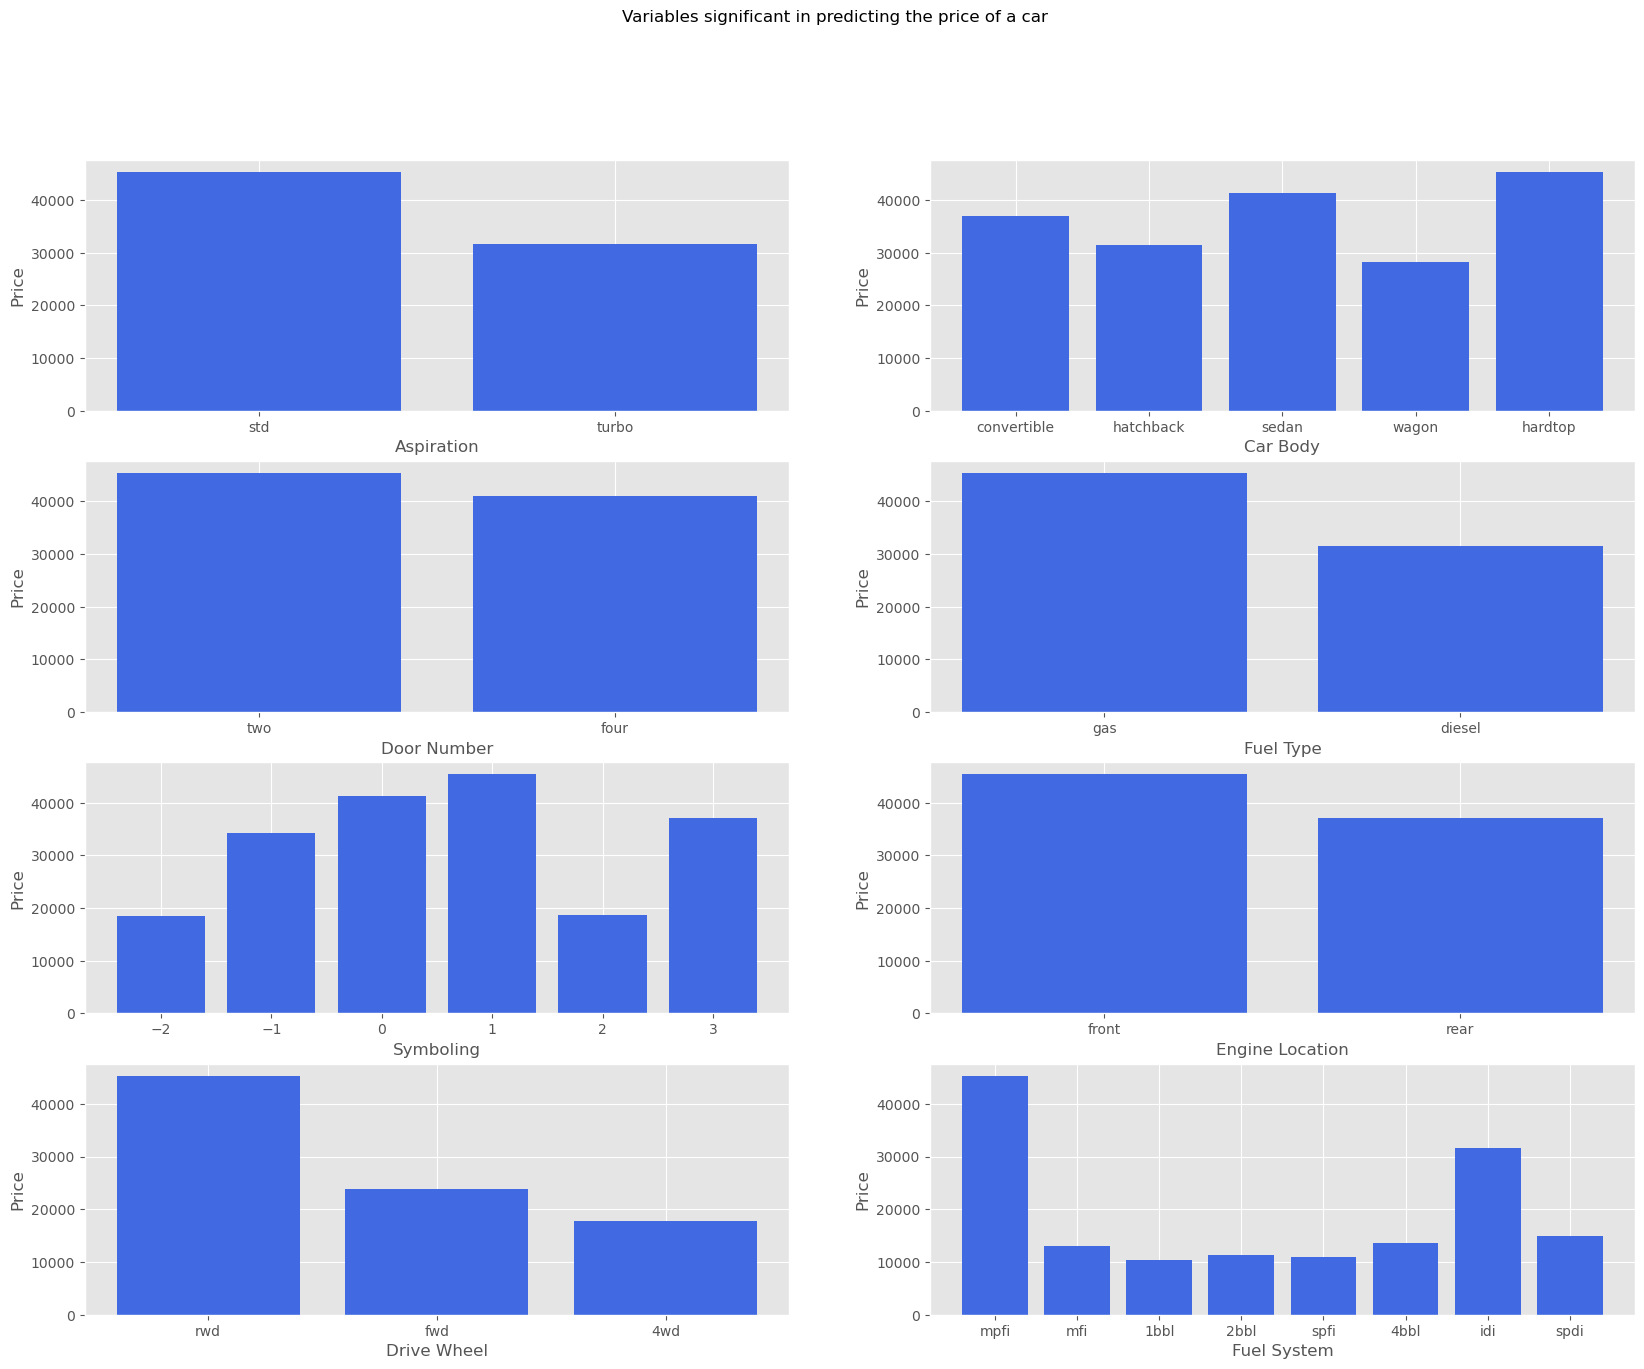

In [17]:
style.use('ggplot')
fig = plt.figure(figsize=(20,15))
fig.suptitle('Variables significant in predicting the price of a car')
plt.subplot(4,2,1)
plt.bar(Aspiration, Price, color='royalblue')
plt.xlabel("Aspiration")
plt.ylabel("Price")
plt.subplot(4,2,2)
plt.bar(Car_body, Price, color='royalblue')
plt.xlabel("Car Body")
plt.ylabel("Price")
plt.subplot(4,2,3)
plt.bar(door_number, Price, color='royalblue')
plt.xlabel("Door Number")
plt.ylabel("Price")
plt.subplot(4,2,4)
plt.bar(fuel_type, Price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.subplot(4,2,5)
plt.bar(Symboling, Price, color='royalblue')
plt.xlabel("Symboling")
plt.ylabel("Price")
plt.subplot(4,2,6)
plt.bar(Engine_location, Price, color='royalblue')
plt.xlabel("Engine Location")
plt.ylabel("Price")
plt.subplot(4,2,7)
plt.bar(Drive_wheel, Price, color='royalblue')
plt.xlabel("Drive Wheel")
plt.ylabel("Price")
plt.subplot(4,2,8)
plt.bar(Fuel_system, Price, color='royalblue')
plt.xlabel("Fuel System")
plt.ylabel("Price")
plt.show()

The variables which are significant in predicting the price of the car are: Aspiration, 
                                                                            Car Body, 
                                                                            Door Number, 
                                                                            Fuel Type, 
                                                                            Symboling, 
                                                                            Engine Location, 
                                                                            Drive wheel, 
                                                                            fuel System.

# 6. How well those variables describe the price of a car.

The variables: 1) Aspiration 2) Fuel Type 3) Drive Wheel 4) Fuel system, describes the price of a car significantly.

The variables: 1) Door Number 2) Engine Location, doesn't shows any significant marks but as it shows the cars having two doors are most probably sports cars which cost way more than a seadan or four door family cars.

The variables: 1) Car Body 2) Symboling, has alot of values which makes it difficult to determine which factor causes significant changes in the price of the cars. But still as you can see in the above graphs of carbody and symboling, The HardTop carbody costs more following up with seadan and wagon is comparetively less in cost than the other car body. same in symboling, 1 costs more following up with 0, 2 and -2 costs about the same price.

# EDA

Checking for outliers

In [18]:
#checking some more information
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<Axes: >

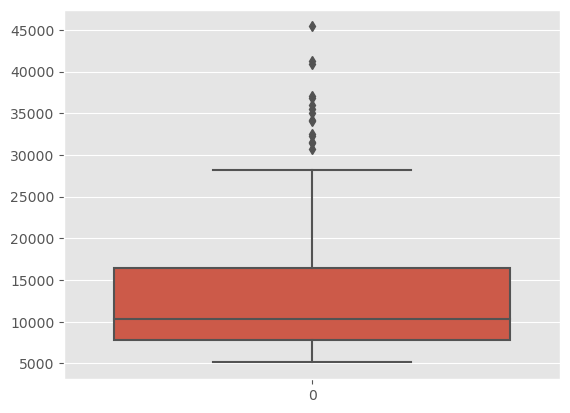

In [19]:
#detecting outliers
sns.boxplot(df['price'])

Locating and finding the outliers in teh dataset

In [20]:
#finding outliers by Z_score method
upper_limit= df['price'].mean() + 3*df['price'].std()
lower_limit= df['price'].mean() - 3*df['price'].std()
print('Upper Limit:', upper_limit)
print('Lower Limit:', lower_limit)

Upper Limit: 37243.267565961156
Lower Limit: -10689.846424497744


In [21]:
#all the outliers
df.loc[(df['price'] > upper_limit) | (df['price'] < lower_limit)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0


In [22]:
#trimmimg the outliers(instead of droping the values, created a new dataset as new_df1 which doesn't include the outliers)
#creating new dataset variable name for the further process as new_df1
new_df1= df.loc[(df['price'] < upper_limit) & (df['price'] > lower_limit)]
print('Before removing outliers:', len(df))
print('After removing outliers:', len(new_df))
print('Outliers:', len(df) - len(new_df))

Before removing outliers: 205
After removing outliers: 105
Outliers: 100


In [23]:
#printing the new dataset(first 20 rows) without the outliers
new_df1.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


Correlation between columns

C:\Users\HP\AppData\Local\Temp\ipykernel_19228\567498542.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df1.corr(), annot=True)


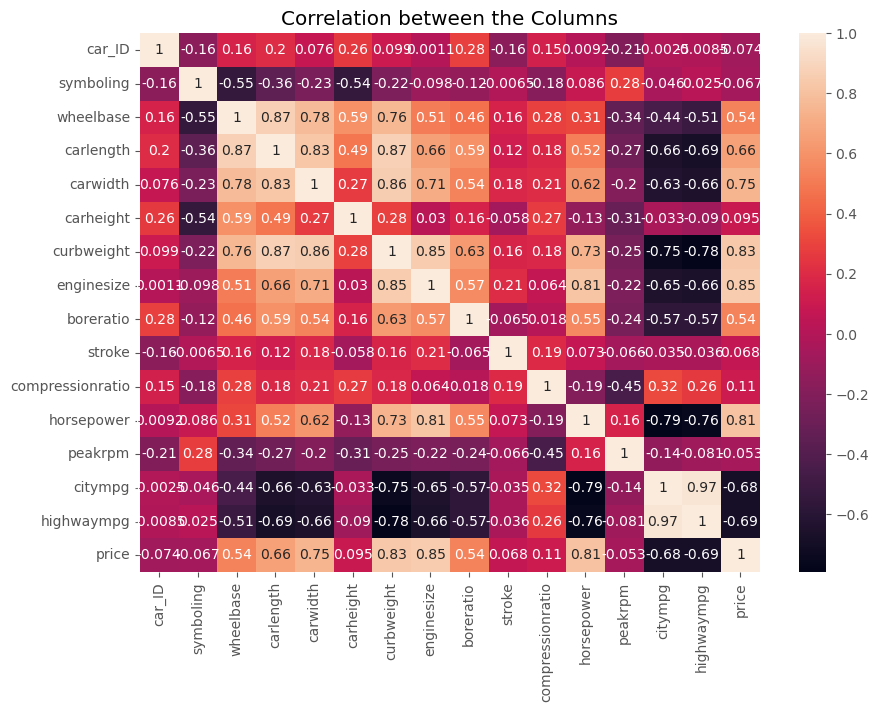

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(new_df1.corr(), annot=True)
plt.title('Correlation between the Columns')
plt.show()

Assinging some column values to 0 and 1's beacause Machine Learning model cannot process string values.

In [25]:
#checking new_df1 for analyising which column values to renamed
new_df1.head(60)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


Assigning values to these particular columns

In [26]:
#only those columns which contains 2 or minimunm number of strings in them
#fueltype
new_df1.loc[new_df1['fueltype'] == 'gas', 'fueltype',] = 1
new_df1.loc[new_df1['fueltype'] == 'diesel', 'fueltype',] = 0

#aspiration
new_df1.loc[new_df1['aspiration'] == 'std', 'aspiration',] = 1
new_df1.loc[new_df1['aspiration'] == 'turbo', 'aspiration',] = 0

#doornumber
new_df1.loc[new_df1['doornumber'] == 'two', 'doornumber',] = 1
new_df1.loc[new_df1['doornumber'] == 'four', 'doornumber',] = 0

#drivewheel
new_df1.loc[new_df1['drivewheel'] == 'rwd', 'drivewheel',] = 1
new_df1.loc[new_df1['drivewheel'] == 'fwd', 'drivewheel',] = 2
new_df1.loc[new_df1['drivewheel'] == '4wd', 'drivewheel',] = 0

#enginelocation
new_df1.loc[new_df1['enginelocation'] == 'front', 'enginelocation',] = 1
new_df1.loc[new_df1['enginelocation'] == 'rear', 'enginelocation',] = 0

In [27]:
#printing new_df1 head to check
new_df1.head(60)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,1,1,convertible,1,1,88.6,...,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,1,1,1,convertible,1,1,88.6,...,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,1,1,1,hatchback,1,1,94.5,...,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,1,1,0,sedan,2,1,99.8,...,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,1,1,0,sedan,0,1,99.4,...,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,1,1,1,sedan,2,1,99.8,...,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,1,1,0,sedan,2,1,105.8,...,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,1,1,0,wagon,2,1,105.8,...,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,1,0,0,sedan,2,1,105.8,...,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),1,0,1,hatchback,0,1,99.5,...,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


Checking values of these columns to see how many unique number of strings they contain 

In [28]:
#enginetype
new_df1['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [29]:
#fuelsystem
new_df1['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [30]:
#carbody
new_df1['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [31]:
#cylindernumber
new_df1['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

'enginetype','fuelsystem','cylindernumber','carbody' = these four columns contains too many different types of strings which is difficult to assign values to, so dropping these columns for further procedure

In [32]:
#dropping the columns 'enginetype','fuelsystem','cylindernumber','carbody'
#creating new dataset variable name for further process as new_df2
new_df2= new_df1.drop(['enginetype','fuelsystem','cylindernumber','carbody'], axis=1)

In [33]:
#checking the head of new_df2 for seeing the columns have droped or not
new_df2.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,1,1,1,1,88.6,168.8,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,1,1,1,1,88.6,168.8,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,1,1,1,1,94.5,171.2,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,1,0,2,1,99.8,176.6,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,1,0,0,1,99.4,176.6,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


# Model Building

In [34]:
#creating X and y matrix
#dropping the Carname because too many strings in the column and price because it needs to be feed in Y
X = new_df2.drop(['CarName','price'], axis=1)
y = new_df2["price"]

In [35]:
X.shape

(202, 20)

In [36]:
y.shape

(202,)

In [37]:
#splitting X and y into training set and testing set
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)

In [39]:
#normalizing data in columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
#importing Linear Regression
from sklearn.linear_model import LinearRegression

In [41]:
#instantiating the model
linreg = LinearRegression()

In [42]:
#fitting the model
linreg.fit(X_train,y_train)

LinearRegression()

# Prediction

In [43]:
y_pred = linreg.predict(X_test)

In [44]:
#performance evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
#now printing the MAE, MSE and R2 score
print("MAE: ", (mean_absolute_error(y_pred, y_test)))
print("MSE: ", (mean_squared_error(y_pred, y_test)))
print("R2 score: ", (r2_score(y_pred, y_test)))

MAE:  2224.0553273384357
MSE:  9088371.645255297
R2 score:  0.686423340300427


# Regression Plot

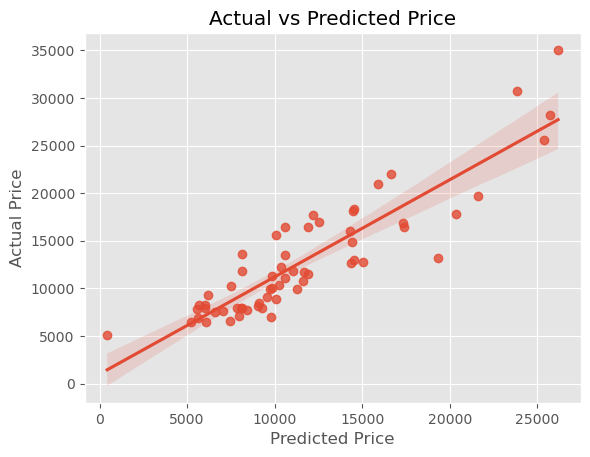

In [46]:
#predicted values vs actual values
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs Predicted Price")
plt.show()

Final Conclusion: 

1) Data collecting: Gathered all the relevent information about the data which are essential for the analysis.
2) Data Sanitization: Then performed data sanitization(checking null values and duplicated values), luckily there were none present in dataset.
3) Problem Statements: Solved the problem statements first because EDA would messed up my further analysis for ML purposes as outliers were needed to be detected for feeding the model.
4) EDA: Outliers were detected, there were 3 outliers present in the dataset, index no.: 16, 73, 74. after that instead of dropping these values from the original dataset, created a new dataset which doesn't include these values as new_df1. After that plotted a heat map to find the better correlation between the variables, then converted those coulmn values whose values where into strings and converted them into 0's and 1's because ML models cannot read string values. These values were removed('enginetype','fuelsystem','cylindernumber','carbody') because these four columns contains too many different types of strings which is difficult to assign values to, so dropping these columns for further procedure would be better option.
5) Model Building: Dropped 'Carname' and taken the 'price' as Y, trained the dataset in 70:30 ratio. then imported the linear regression and fitted in the model.  
6) Prediction: MeanAbsoluteError: 2224.0553273384357, MeanSquaredError: 9088371.645255297 and R2 score: 0.686423340300427
7) Regression Plot(Actual vs Predicted Values): The predicted prices as as close as the actual price till 15000rs but after 15000rs there is difference being observed. most probably because of the 'cylindernumber' column, but as it is a self analysis(done for personal use, mostly skilled based) so there always a room for improvemnets.